In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
df = pd.read_csv('nursery.data',header=None)
df.columns = ['parents','has_nurs','form','children','housing','finance','social','health','target']
df.target = df.target.replace({'spec_prior':'recommend' ,'very_recom': 'recommend' })

In [3]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
df.isna().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
target      0
dtype: int64

In [5]:
cat_columns = df.columns.to_list()
cat_columns

['parents',
 'has_nurs',
 'form',
 'children',
 'housing',
 'finance',
 'social',
 'health',
 'target']

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_label_enc = pd.DataFrame()

for col in cat_columns:
    df_label_enc[col] = label_encoder.fit_transform(df[col])

In [7]:
df_label_enc.head()

,parents,has_nurs,form,children,housing,finance,social,health,target
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[[col for col in cat_columns if col not in ['target']]])

df_one_hot = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())
df_one_hot['target'] = df_label_enc['target'].copy()

In [9]:
df_one_hot

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended,target
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2
12956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
12957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2
12958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2


In [13]:
accuracies = {
    'DecisionTree' : [],
    'DecisionTree_OHE' : [],
    'LogisticRegression_L1' : [],
    'knn' : []
}

In [14]:
#Decision Tree (categorical features)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


for _ in range(5):

    X_train,X_test,y_train,y_test = train_test_split(df_label_enc.drop('target',axis=1) , df_label_enc['target'], test_size=0.25)

    dt = DecisionTreeClassifier(random_state=42)

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [None, 'sqrt', 'log2']
    }

    

    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(accuracy)
    accuracies['DecisionTree'].append(accuracy)



Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.995679012345679
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9947530864197531
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9950617283950617
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9935185185185185
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9953703703703703


In [15]:
#Decision Tree (categorical features in one-hot encoded form)

for _ in range(5):
    
    X_train,X_test,y_train,y_test = train_test_split(df_one_hot.drop('target',axis=1) , df_one_hot['target'], test_size=0.25)

    dt = DecisionTreeClassifier(random_state=42)

    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [None, 'sqrt', 'log2']
    }

    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(accuracy)
    accuracies['DecisionTree_OHE'].append(accuracy)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9966049382716049
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9959876543209877
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9972222222222222
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9947530864197531
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
0.9966049382716049


In [16]:
#Logistic Regression with L1 regularization

from sklearn.linear_model import LogisticRegression

for _ in range(5):
    
    X_train,X_test,y_train,y_test = train_test_split(df_one_hot.drop('target',axis=1) , df_one_hot['target'], test_size=0.25)

    log = LogisticRegression()

    param_grid = {
    'C': np.logspace(-4, 4, 20), 
    'penalty': ['l1'],           
    'solver': ['liblinear']     
}


    grid_search = GridSearchCV(
        estimator=log,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(accuracy)
    accuracies['LogisticRegression_L1'].append(accuracy)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9200617283950617
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9117283950617284
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9175925925925926
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9148148148148149
Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9163580246913581


In [17]:
# k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

for _ in range(5):

    X_train,X_test,y_train,y_test = train_test_split(df_one_hot.drop('target',axis=1) , df_one_hot['target'], test_size=0.25)

    knn = KNeighborsClassifier()

    param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

    grid_search = GridSearchCV(
        estimator=knn,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(accuracy)
    accuracies['knn'].append(accuracy)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\gokul\anaconda3\envs\dsai\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.9682098765432099
Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.9561728395061728
Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.9564814814814815
Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.9527777777777777
Fitting 5 folds for each of 32 candidates, totalling 160 fits
0.9561728395061728


In [18]:
accuracies

{'DecisionTree': [0.995679012345679,
  0.9947530864197531,
  0.9950617283950617,
  0.9935185185185185,
  0.9953703703703703],
 'DecisionTree_OHE': [0.9966049382716049,
  0.9959876543209877,
  0.9972222222222222,
  0.9947530864197531,
  0.9966049382716049],
 'LogisticRegression_L1': [0.9200617283950617,
  0.9117283950617284,
  0.9175925925925926,
  0.9148148148148149,
  0.9163580246913581],
 'knn': [0.9682098765432099,
  0.9561728395061728,
  0.9564814814814815,
  0.9527777777777777,
  0.9561728395061728]}

In [19]:
def mean_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = st.sem(data) 
    interval = st.t.interval(confidence, len(data)-1, loc=mean, scale=sem)
    return mean, interval

In [47]:
means = []
conf_intervals = []

for model, scores in accuracies.items():
    mean, ci = mean_confidence_interval(scores)
    means.append(mean)
    conf_intervals.append(ci)


model_names = list(accuracies.keys())
means = np.array(means) * 100 

conf_intervals = np.array(conf_intervals) * 100 


lower_bounds = means - conf_intervals[:, 0]
upper_bounds = conf_intervals[:, 1] - means

means = means.tolist()
lower_bounds = lower_bounds.tolist()
upper_bounds = upper_bounds.tolist()

In [48]:
model_names.append('XgBoost')
model_names.append('Support Vector Machine')
model_names.append('Random Forest')
model_names.append('Neural Networks')
model_names.append('Logistic Regression')

means.append(100)
means.append(99.198)
means.append(98.025)
means.append(100)
means.append(92.253)

lower_bounds.append(means[4] - 99.907)
lower_bounds.append(means[5] -98.889)
lower_bounds.append(means[6] -97.531)
lower_bounds.append(means[7] -100)
lower_bounds.append(means[8] -91.327)

upper_bounds.append(100 - means[4])
upper_bounds.append(99.475- means[5])
upper_bounds.append(98.488- means[6])
upper_bounds.append(100- means[7])
upper_bounds.append(93.117- means[8])

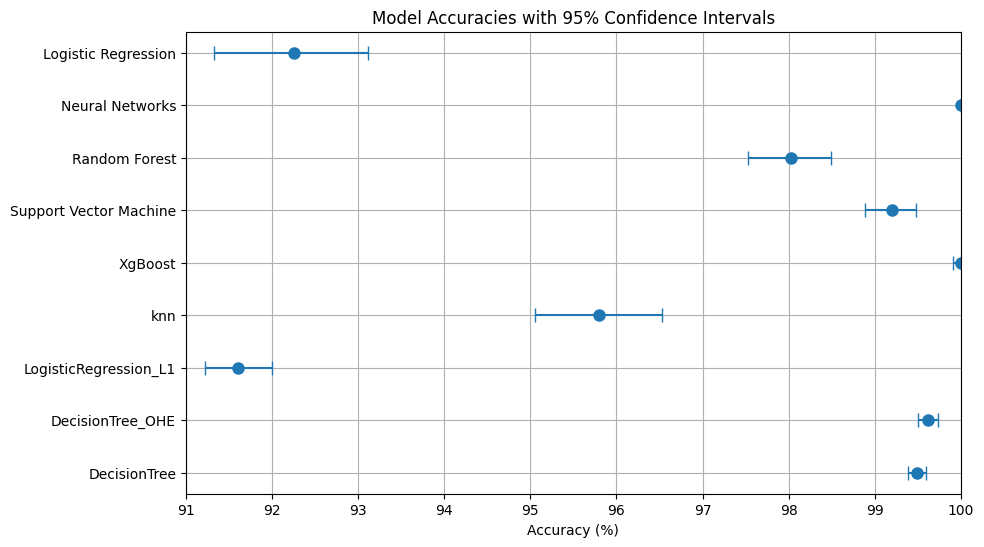

In [49]:
plt.figure(figsize=(10, 6))


plt.errorbar(means, model_names, xerr=[lower_bounds, upper_bounds], fmt='o', capsize=5, markersize=8, linestyle='None')
plt.title("Model Accuracies with 95% Confidence Intervals")
plt.xlabel("Accuracy (%)")


plt.xlim(93, 100)
plt.xticks(np.arange(91, 101, 1)) 

plt.grid(True)
plt.show()

# Task 2

In [22]:
# Constructing a bipolar sigmoid function from unipolar sigmoid function
import math 

def unipolar_sigmoid(x,a=1):
    return 1 / (1 + math.exp(-x*a))

def bipolar_sigmoid(x,a=1):
    return 2 * unipolar_sigmoid(x,a) - 1

In [23]:
# Lets plot these functions

x = np.linspace(-10,10,100)
y_uni = []
y_bi =[]
for i in x:
    y_uni.append(unipolar_sigmoid(i))
    y_bi.append(bipolar_sigmoid(i)) 


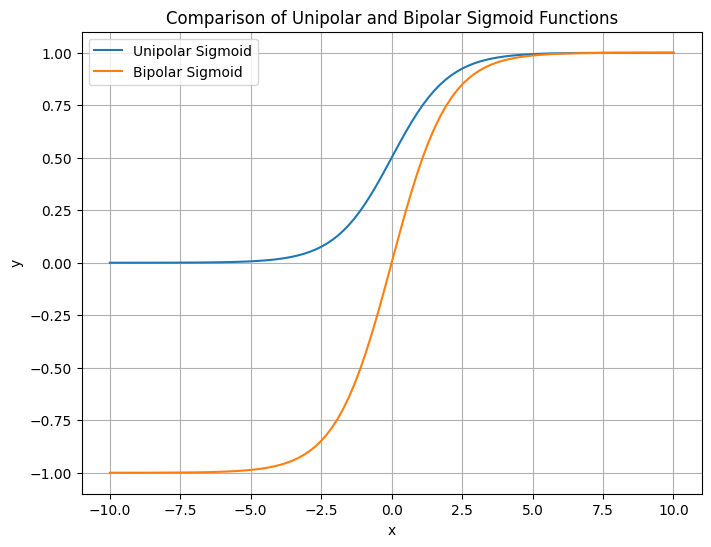

In [24]:
plt.figure(figsize=(8, 6))  
plt.plot(x, y_uni, label='Unipolar Sigmoid')
plt.plot(x, y_bi, label='Bipolar Sigmoid')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Unipolar and Bipolar Sigmoid Functions')
plt.legend()

plt.grid(True) 
plt.show()

In [25]:
# Using tanh function

def tanh(x,a=1):
    return (np.exp(a*x) - np.exp(-x*a)) / (np.exp(a*x) + np.exp(-x*a))

In [26]:
y_tanh = []

for i in x:
    y_tanh.append(tanh(i))

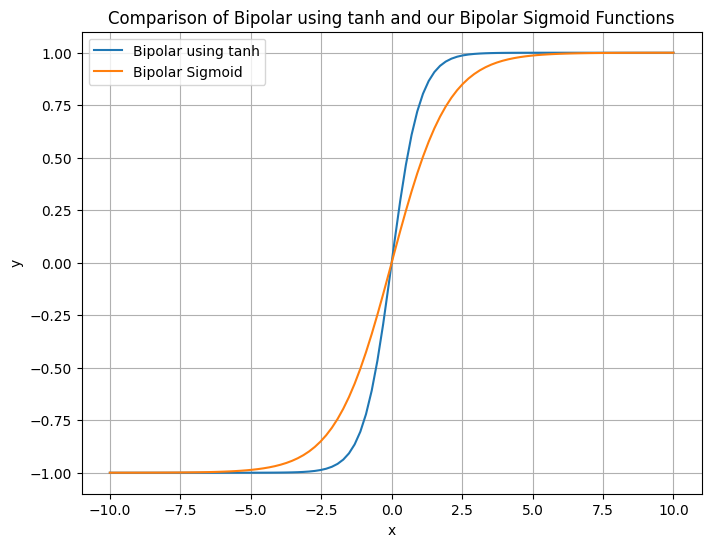

In [27]:
plt.figure(figsize=(8, 6))  
plt.plot(x, y_tanh, label='Bipolar using tanh')
plt.plot(x, y_bi, label='Bipolar Sigmoid')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Bipolar using tanh and our Bipolar Sigmoid Functions')
plt.legend()

plt.grid(True) 
plt.show()

We can see that the function created with tanh function has higher slope than our bipolar function. Although it shares some common characteristics like zero mean, and the range goes from -1 to +1. 

In [28]:
# Parameterising with one more parameter called 'a' with [-5, -1, -.1, -.01, .001, .01, .1, 1, 5]

a = [-5, -1, -.1, -.01, .001, .01, .1, 1, 5]

y_bi_a = {}
y_tanh_a = {}

for i in a:
    y_bi_a[i] = []
    y_tanh_a[i]=[]

print(y_bi_a)
print(y_tanh_a)


{-5: [], -1: [], -0.1: [], -0.01: [], 0.001: [], 0.01: [], 0.1: [], 1: [], 5: []}
{-5: [], -1: [], -0.1: [], -0.01: [], 0.001: [], 0.01: [], 0.1: [], 1: [], 5: []}


In [29]:

for ai in a:
    for i in x:
        y_bi_a[ai].append(bipolar_sigmoid(i,ai))
        y_tanh_a[ai].append(tanh(i,ai)) 

In [30]:
print(y_bi_a)
print(y_tanh_a)

{-5: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999996, 0.9999999999999987, 0.999999999999996, 0.9999999999999889, 0.9999999999999698, 0.9999999999999165, 0.9999999999997708, 0.9999999999993712, 0.9999999999982729, 0.999999999995258, 0.9999999999869784, 0.999999999964245, 0.9999999999018208, 0.9999999997304116, 0.9999999992597437, 0.999999997967346, 0.9999999944185793, 0.9999999846740983, 0.9999999579169385, 0.9999998844450362, 0.9999996827001574, 0.9999991287334693, 0.9999976076099051, 0.999993430801523, 0.9999819618834829, 0.9999504703060593, 0.9998640033651154, 0.9996266141100774, 0.998975061835611, 0.9971881602489825, 0.9922979352881394, 0.9789923109734291, 0.9433542359113936, 0.8517865273499055, 0.63964681328466, 0.24729096500658443, -0.24729096500658432, -0.63964681328466, -0.8517865273499055, -0.9433542359113938, -0.9789923109734291, -0.9922979352881395, -0.9971881602489827, -0.9989750618356111, -0.9996266141100774, -0.9998640033651153, -0

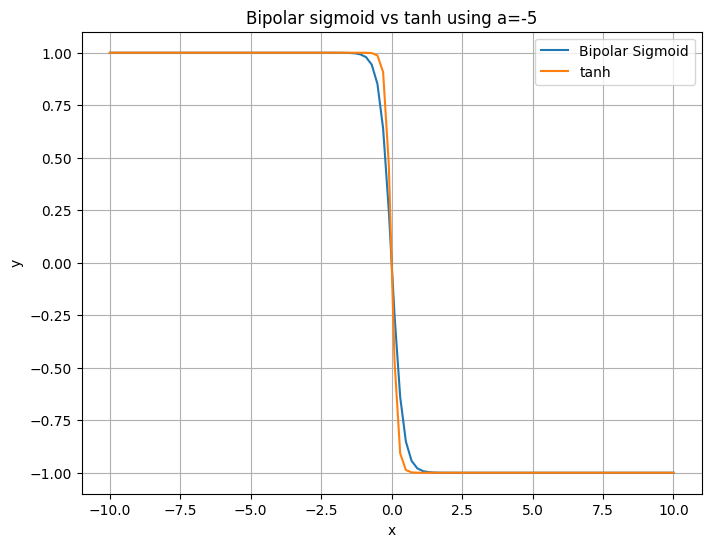

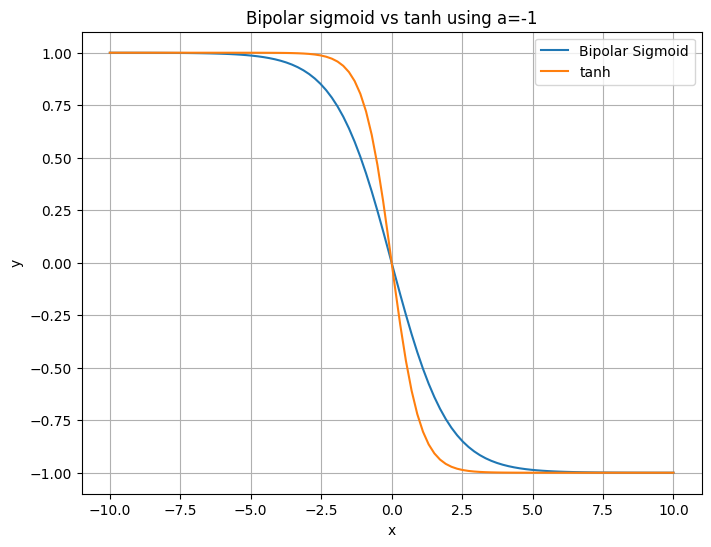

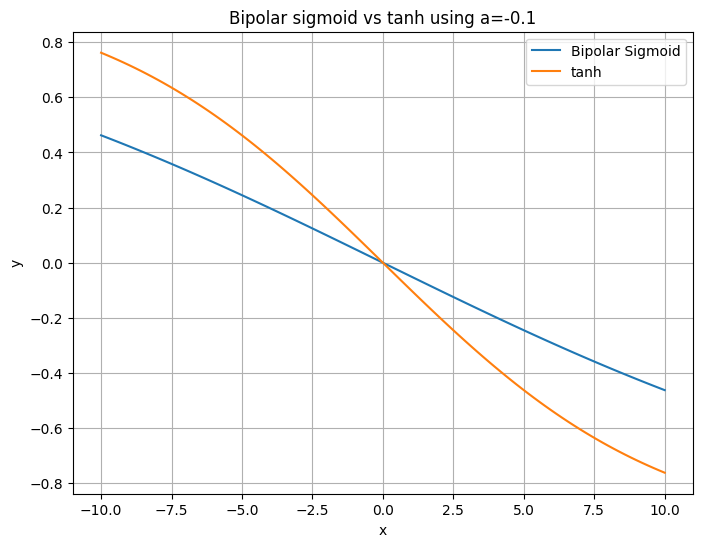

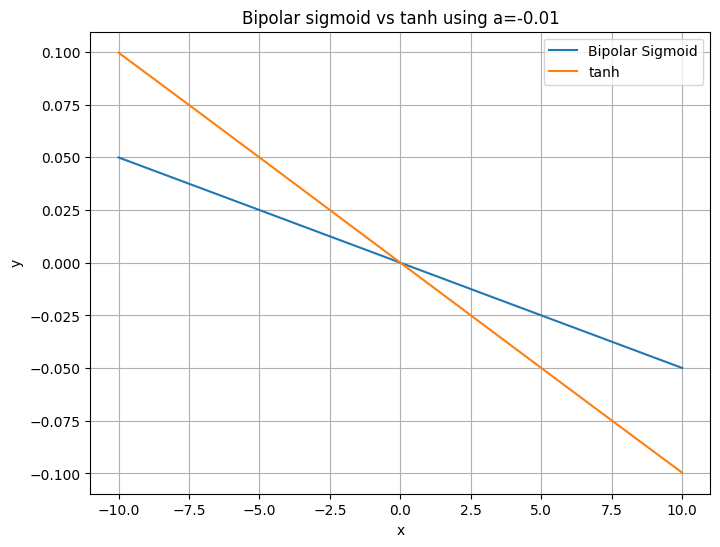

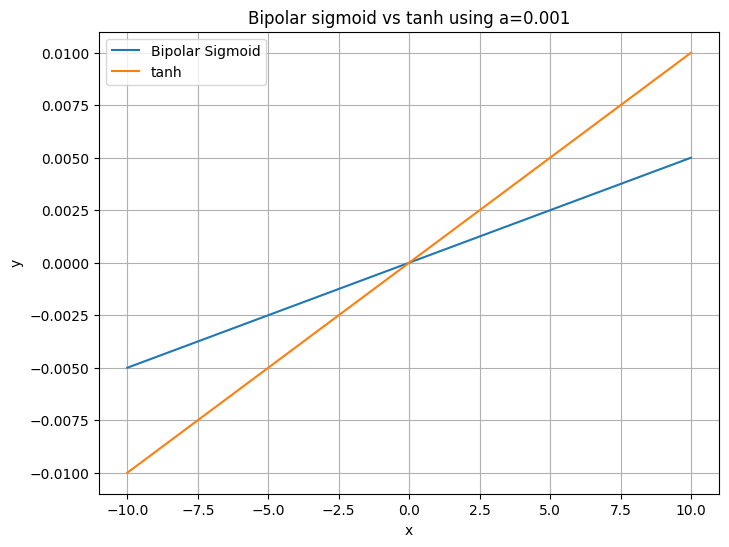

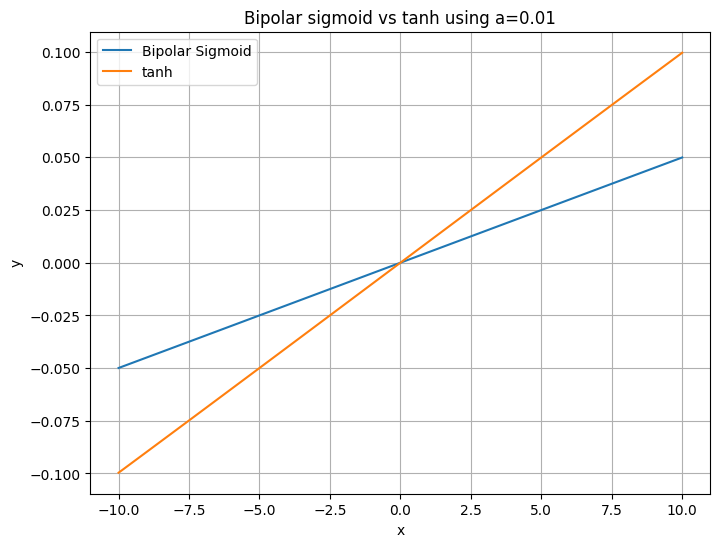

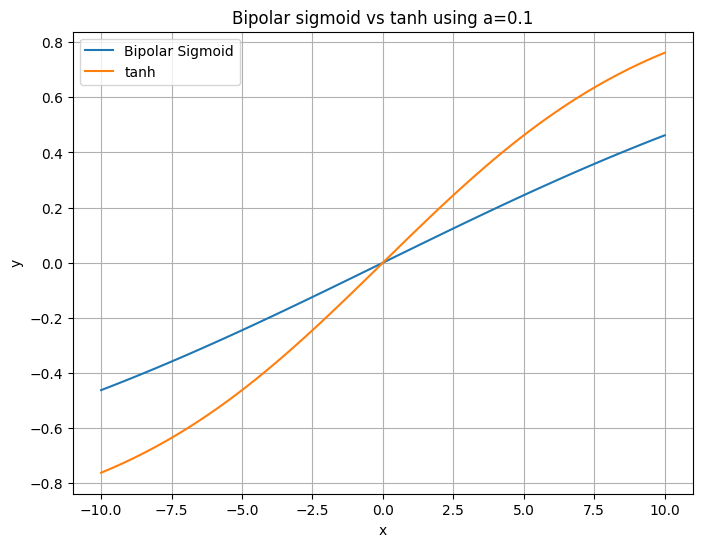

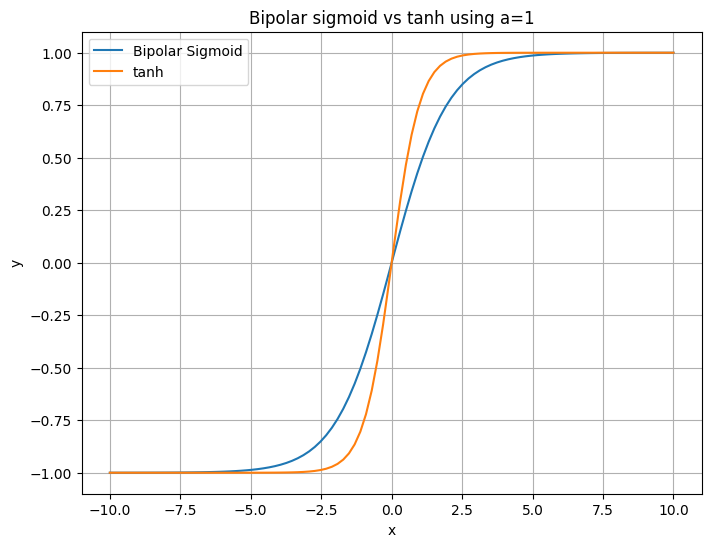

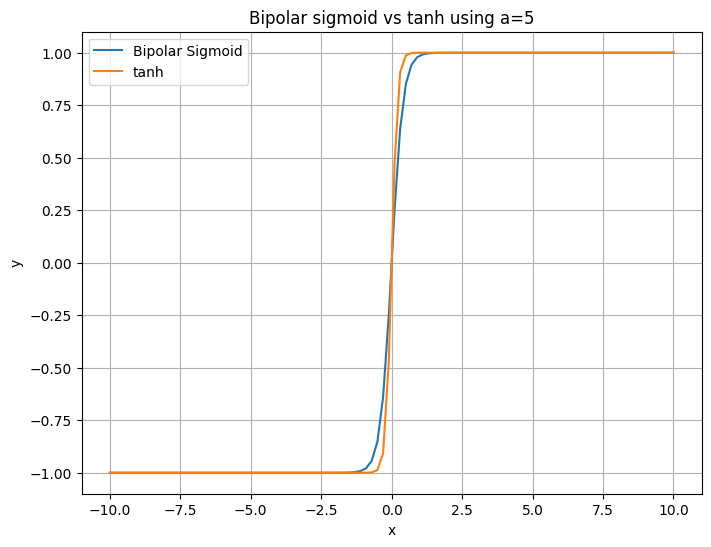

In [31]:
for i in a:    
    plt.figure(figsize=(8, 6))  
    plt.plot(x, y_bi_a[i], label='Bipolar Sigmoid')
    plt.plot(x, y_tanh_a[i], label='tanh')
    


    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Bipolar sigmoid vs tanh using a={i}')
    plt.legend()

    plt.grid(True) 
    plt.show()

From the plots above, we can observe that in both tanh and bipolar_sigmoid function, as the value of `a` comes near 0, the curve turns into a straing line. As the value of `a` moves away from 0, with small change in x values, the change in y value is huge near 0 and after some threshold, the change is negligible. More the distance of value of `a` from 0, lesser the threshold is. For example, when the value of a is 1, the threshold is around 5, after which the change is negligible. When the value of a is 5 (greater than 1), the threshold is around 1.5. But when the value of a is 0.01 (close to 0), the threshold is somewhere above 10. Thats the conclusion we can derive from these plot. 

## Conclusion:
Higher the distance of value of a from 0, lesser the distance of threshold from 0, and vice versa.

Another conclusion is when the value of a is positive, we have positive slope, when a is negative we have negative slope(like a mirror image along y axis.). But in both cases the absolute value of slope of tanh function is greater than the absolute value of slope of bipolar_sigmoid function

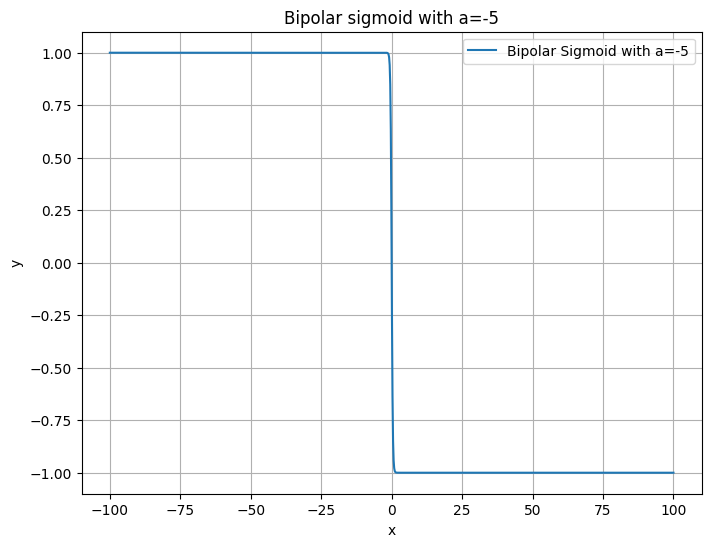

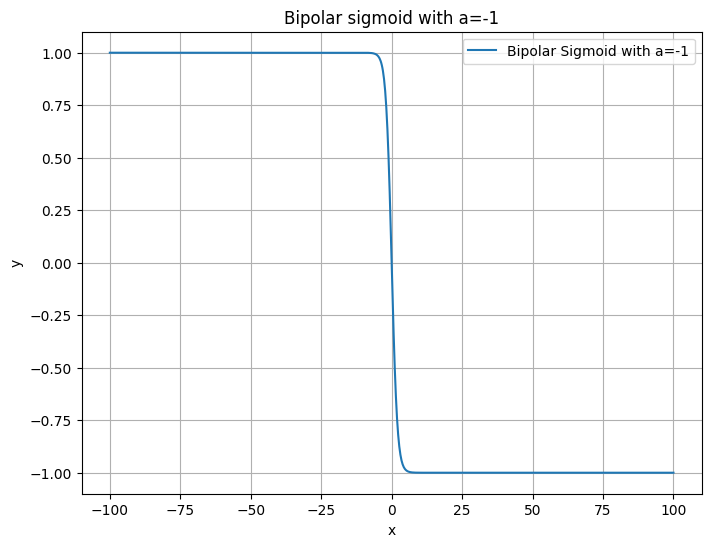

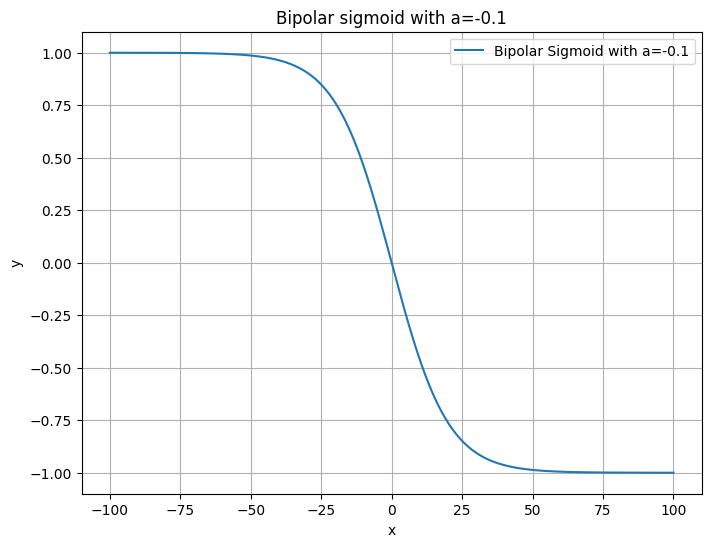

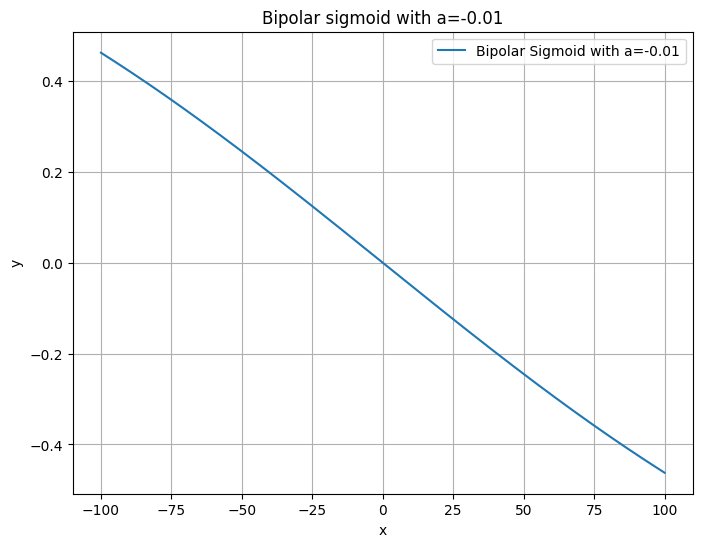

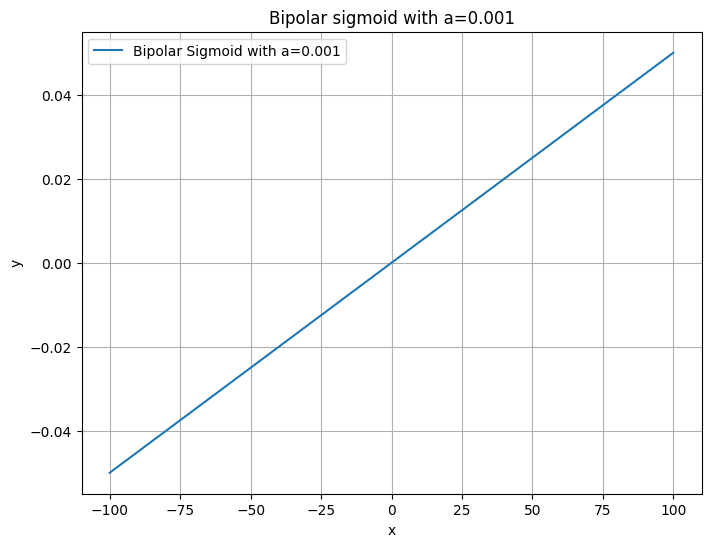

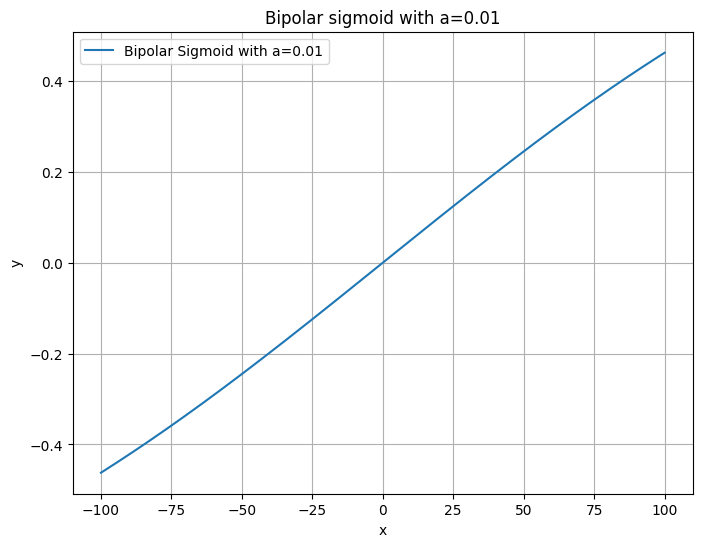

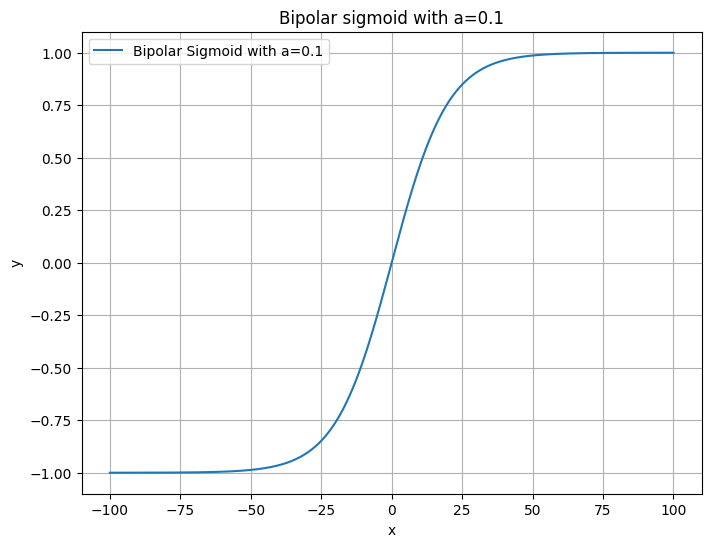

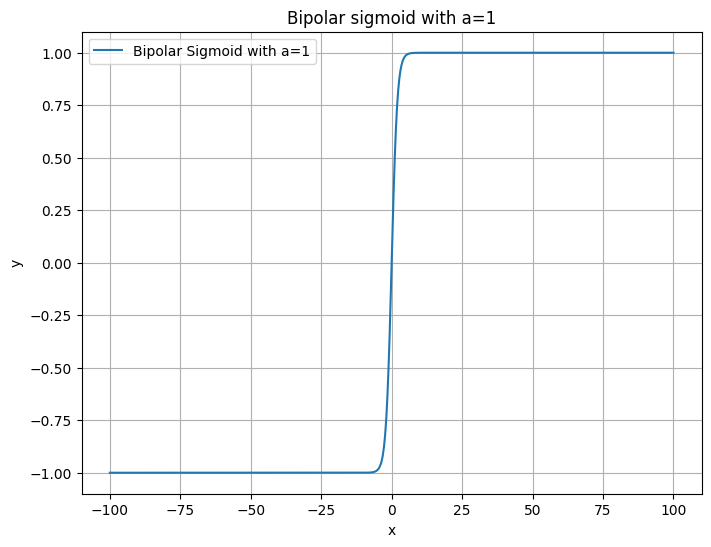

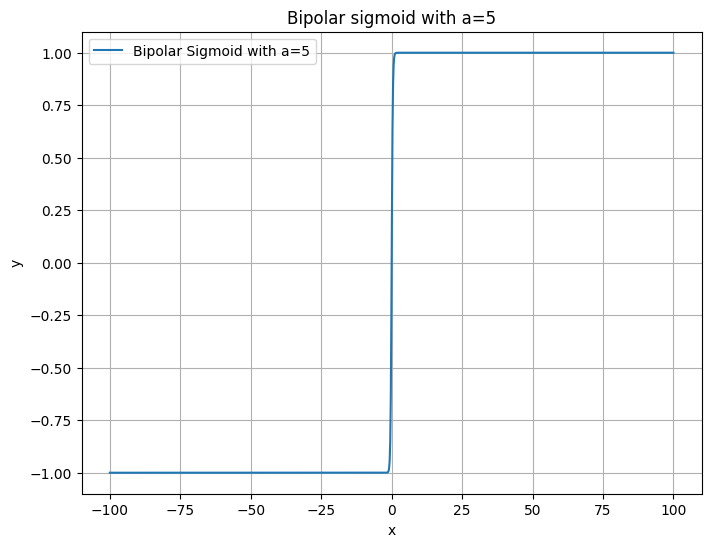

In [33]:
# Linear range of x vs a

X = np.linspace(-100,100,1000)

for i in a:
    y=[]
    for x in X:
        y.append(bipolar_sigmoid(x,i))
        #y.append(1)

    plt.figure(figsize=(8, 6))  
    plt.plot(X, y, label=f'Bipolar Sigmoid with a={i}')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Bipolar sigmoid with a={i}')
    plt.legend()

    plt.grid(True) 
    plt.show()

        


When the value of a is close to 0 (0.01), the linear range is around (-1.25,1.25), after and before this range, the value almost remains constant. with decrease in absolute value of a (less the distance of a from 0), the linear range increases drastically. For example, at a=0.1, linear range is from (-50,50).